<div class="alert alert-success">
<h2> Дипломное задание «HR.csv»</h2>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.<br>
Признаки:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

<div class="alert alert-block alert-info"> 
<h3>1. Загрузите файл HR.csv в pandas dataframe (5)</h3>
</div>

In [2]:
df = pd.read_csv('HR.csv')
df.columns = df.columns.str.lower()

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<div class="alert alert-block alert-info"> 
<h3>2. Рассчитайте основные статистики для переменных <br> 
    (среднее, медиана, мода, мин/макс, сред.отклонение) (10)</h3>
</div>

Выделим числовые и категориальные признаки:

In [5]:
categorical_columns = ['department', 'salary']
binary_columns = ['work_accident', 'left', 'promotion_last_5years']
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 
                     'average_montly_hours', 'time_spend_company']

In [6]:
df[categorical_columns].describe()

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Всего 10 разных отделов, самый частый - 'продажи' (4140/14999 = 28% от общего количества наблюдений).  
И три уровня заработка, самый частый - 'низкий' (7316/14999 = 49% от общего количества наблюдений)

In [7]:
df[binary_columns].astype(str).describe()

,work_accident,left,promotion_last_5years
count,14999,14999,14999
unique,2,2,2
top,0,0,0
freq,12830,11428,14680


По бинарным признакам (от общего количества наблюдений):  
- несчастные случаи на рабочем месте (14999-12830)/14999 = 14%
- увольнение сотрудника (14999-11428)/14999 = 24%
- повышение сотрудника за последние пять лет (14999-14680)/14999 = 2%

In [8]:
df[numerical_columns].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


<div class="alert alert-block alert-info"> 
<h3>3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. <br>
Определите две самые скоррелированные и две наименее скоррелированные переменные (10)</h3>
</div>

In [9]:
df[numerical_columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Две наиболее скоррелированные переменные - это Количество проектов и Среднее количество часов в месяц, 42%.<br>
Две наименее скоррелированные переменные - это Уровень удовлетворенности и Среднее количество часов в месяц, 2%.

В целом признаки между собой слабо скоррелированны. Посмотрим на это также графически:

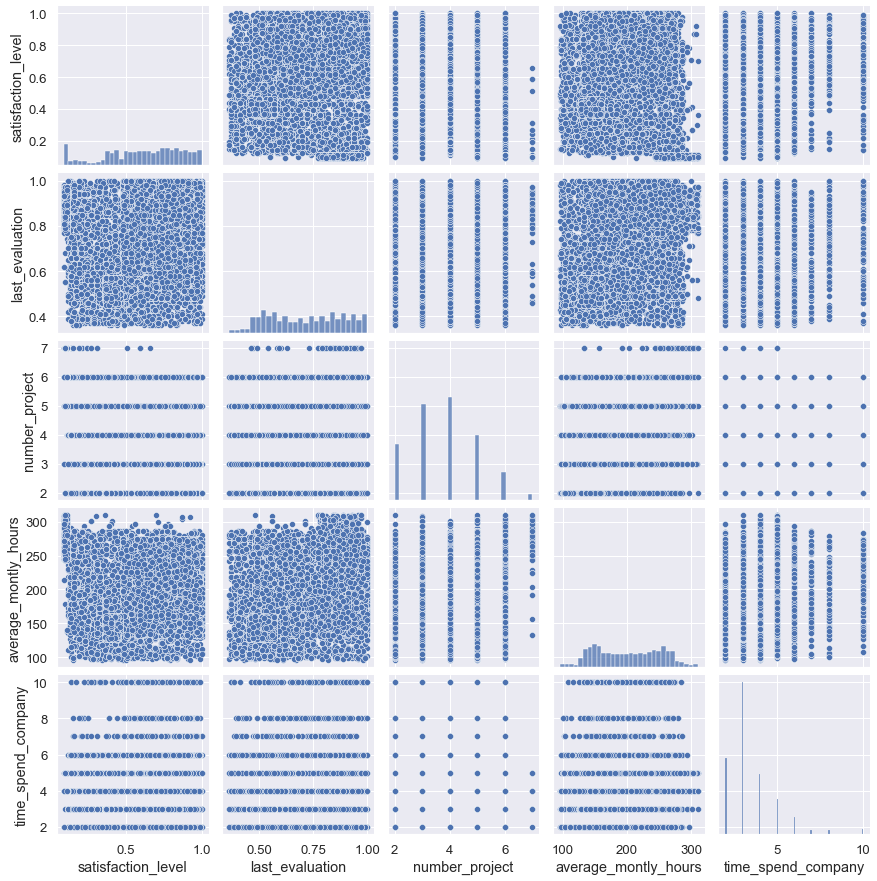

In [10]:
sns.set(font_scale=1.2);
sns.pairplot(df[numerical_columns])

<div class="alert alert-block alert-info"> 
<h3>4. Рассчитайте сколько сотрудников работает в каждом департаменте (5)</h3>
</div>

In [11]:
departments_employees_number = df.loc[df['left'] == 0]['department'].value_counts().sort_values(ascending=False)

In [12]:
departments_employees_number

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

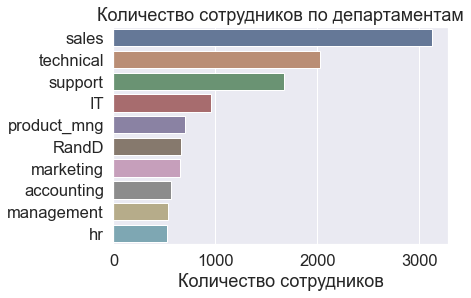

In [13]:
sns.set(font_scale=1.5);
plt.title(f"Количество сотрудников по департаментам",fontsize=18);
sns.barplot(x=departments_employees_number.values, y=departments_employees_number.index, saturation=.5);
plt.xlabel('Количество сотрудников');

<div class="alert alert-block alert-info"> 
<h3>5. Показать распределение сотрудников по зарплатам (5)</h3>
</div>

In [14]:
distribution_by_salary = df.loc[df['left'] == 0]['salary'].value_counts().sort_values()

In [15]:
distribution_by_salary

high      1155
medium    5129
low       5144
Name: salary, dtype: int64

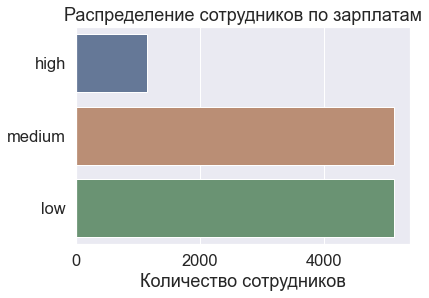

In [16]:
plt.title(f"Распределение сотрудников по зарплатам",fontsize=18);
sns.set(font_scale=1.8);
sns.barplot(x=distribution_by_salary.values, y=distribution_by_salary.index, saturation=.5);
plt.xlabel('Количество сотрудников');

<div class="alert alert-block alert-info"> 
<h3>6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5)</h3>
</div>

In [17]:
salary_distribution_by_departments = (df.loc[df['left'] == 0][['department','salary']]
                                      .value_counts().to_frame(name='employees_number').reset_index())

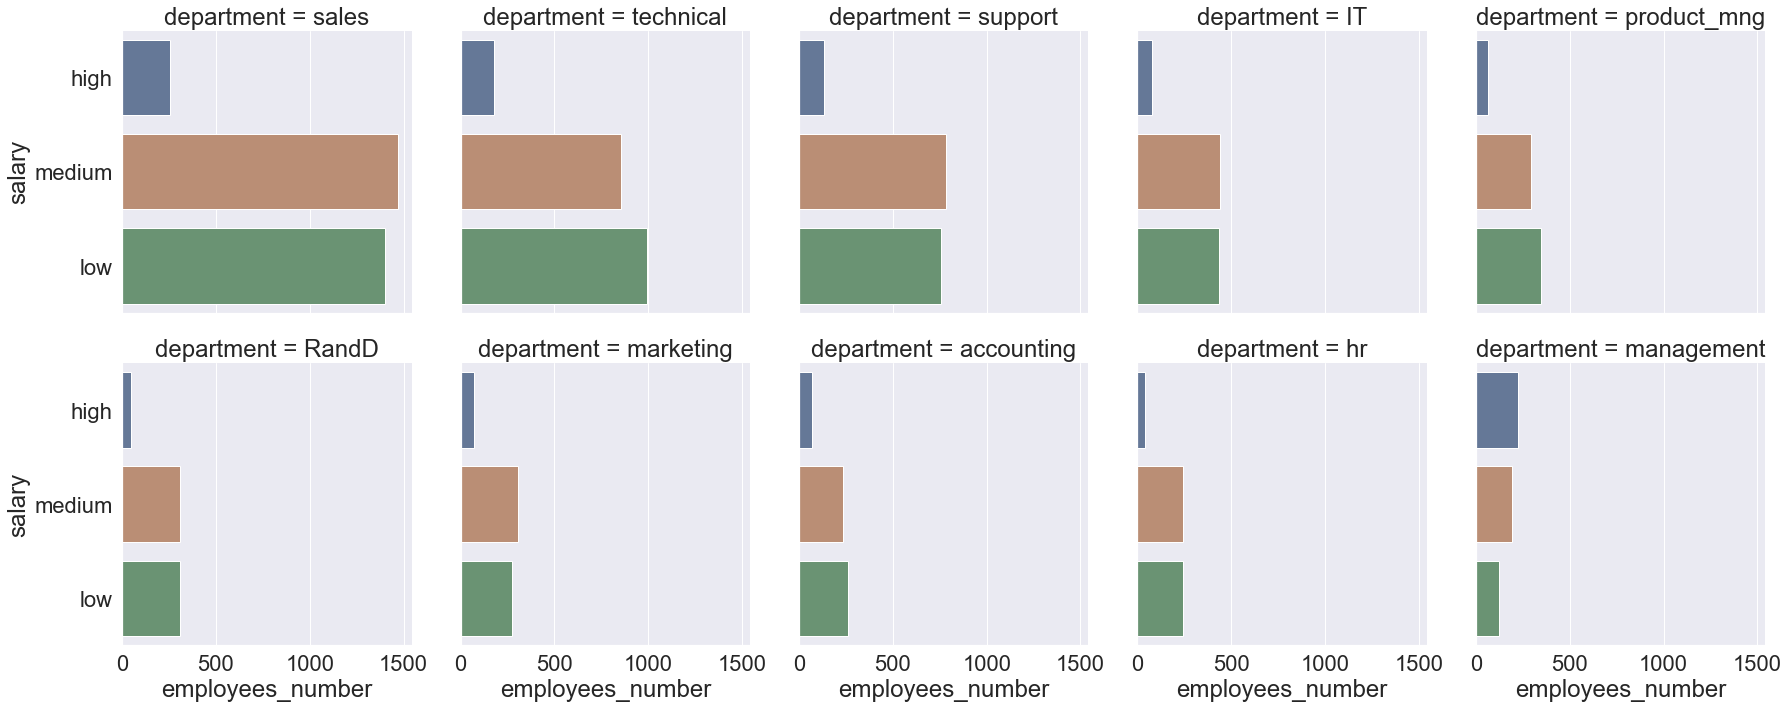

In [18]:
sns.set(font_scale=2)
sns.catplot(x="employees_number", y="salary", col="department",
                data=salary_distribution_by_departments, saturation=.5,
                kind="bar", ci=None, orient="h", col_wrap=5, order=['high','medium','low']);

<div class="alert alert-block alert-info"> 
<h3>7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом (10)</h3>
</div>

Сформулируем нулевую и альтернативную гипотезы:
- H0: Сотрудники с высоким окладом проводят на работе столько же или меньше времени, чем сотрудники с низким окладом.<br>
- H1: Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.<br>
- Пороговый уровень статистической значимости: 5%

In [19]:
A = df.query("salary == 'high' and left == 0").average_montly_hours
B = df.query("salary == 'low' and left == 0").average_montly_hours

In [20]:
alpha = 0.05
pvalue = stats.ttest_ind(A, B, equal_var=False, alternative='greater').pvalue
print(f'pvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue = 0.12592855213570403
Не получилось отвергнуть нулевую гипотезу


Похоже сотрудники с высоким окладом проводят на работе примерно столько же времени, как и сотрудники с низким окладом.  
Посмотрим на это графически. Поскольку, как мы видели выше, количество сотрудников в этих категориях существенно отличается, построим гистограмму плотности:

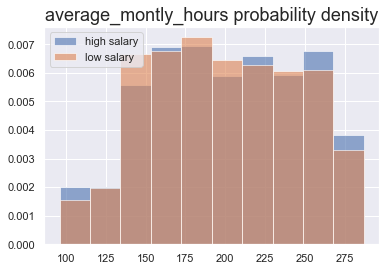

In [21]:
sns.set(font_scale=1)
plt.hist(A, alpha=0.6, label='high salary', density=True);
plt.hist(B, alpha=0.6, label='low salary', density=True);
plt.title('average_montly_hours probability density', fontsize=18);
plt.legend(loc='upper left');

<div class="alert alert-block alert-info"> 
<h3>8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников <br> (по отдельности): (10) <br><br>
● Доля сотрудников с повышением за последние 5 лет <br>
● Средняя степень удовлетворенности <br>
● Среднее количество проектов</h3>
</div>

In [22]:
pd.pivot_table(df, index='left', values=['promotion_last_5years', 'satisfaction_level', 'number_project'], 
               aggfunc={'promotion_last_5years': 'mean', 'satisfaction_level': 'mean', 'number_project': 'mean'})

,number_project,promotion_last_5years,satisfaction_level
left,,,
0,3.786664,0.026251,0.666810
1,3.855503,0.005321,0.440098


Вполне предсказуемо, что среди уволившихся сотрудников доля с повышением за последние 5 лет и уровень удовлетворенности ниже, чем у не уволившихся сотрудников.

<div class="alert alert-block alert-info"> 
<h3>9. 
Разделить данные на тестовую и обучающую выборки. <br>
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и
salary). <br>
Оценить качество модели на тестовой выборке (20)</h3>
</div>

In [23]:
X = df.drop(columns=['department', 'salary', 'left'])
y = df.left

Разделим данные на тестовую и обучающую выборки в отношении 30/70:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Построим модель линейного дискриминантного анализа LDA:

In [25]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

Оценим качество модели на тестовой выборке:

In [26]:
accuracy_score(y_test, y_pred)

0.7557777777777778

<div class="alert alert-block alert-info"> 
<h3>10. Загрузить jupyter notebook с решение на github и прислать ссылку (5)</h3>
</div>

<div class="alert alert-success">
<h3> Done</h3>
</div>